In [1]:
# Importando bibliotecas
%matplotlib inline
from google.colab import files
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [ ]:
# Importanto e unzipando imagens
!unzip photophoda.zip

unzip:  cannot find or open leapGestRecog.zip, leapGestRecog.zip.zip or leapGestRecog.zip.ZIP.


In [2]:
# Colocando imagens em uma tupla
imagepaths = ['/content/a.jpg']

# Olhar diretórios e salvar dentro de uma lista
for root, dirs, files in os.walk(".", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): # We want only the images
      imagepaths.append(path)

print(len(imagepaths)) # PNG carregado se diferente de zero

1


In [3]:
# Mostrando o resultado e plotando o notebook

def plot_image(path):
  img = cv2.imread(path) 
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  print(img_cvt.shape)
  plt.grid(False) 
  plt.imshow(img_cvt) 
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(1280, 1210)


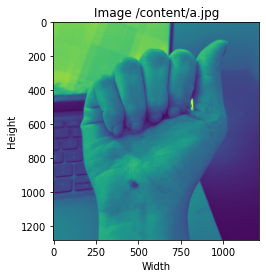

In [4]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [26]:
X = [] # Imagens
y = [] # Labels

# Loops nos diretorios para carregar imagens e labels no array
for path in imagepaths:
  img = cv2.imread(path) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  img = cv2.resize(img, (320, 120)) 
  X.append(img)

  category = path.split("/")[2]
  print(category[0])
  print(type(category))
  label = int(category[0]) 
#  y.append(label)

#X = np.array(X, dtype="uint8")
#X = X.reshape(len(imagepaths), 120, 320, 1)
#y = np.array(y)

#print("Imagens carregadas:", len(X))
#print("Labels carregadas: ", len(y))

#print(y[0], imagepaths[0])

a
<class 'str'>


ValueError: ignored

In [ ]:
# Importando bibliotecas
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [ ]:
# Construção do modelo
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Configurando o modelo para treinamento
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

In [ ]:
# Treinando o modelo para um número x de épocas e valida o mesmo
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

In [ ]:
# Salvando o modelo para uso posterior
model.save('handrecognition_model.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Teste de acurácia: {:2.2f}%'.format(test_acc*100))

In [ ]:
# Fazendo predições
predictions = model.predict(X_test) 

NameError: ignored

In [ ]:
# Plotando imagens para validação 
def validate_9_images(predictions_array, true_label_array, img_array):
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

In [ ]:
validate_9_images(predictions, y_test, X_test)

In [ ]:
# Transforma predição num array 1-D com labels numéricas
y_pred = np.argmax(predictions, axis=1) 

NameError: ignored

In [ ]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])